# Stock Portfolio Chart Prep

## Setup

In [1]:
import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
import requests
import bokeh.plotting as bk
from bokeh.models import HoverTool, Label, BoxZoomTool, PanTool, ZoomInTool, ZoomOutTool, ResetTool
from pandas.plotting._converter import DatetimeConverter

company_symbol = 'AAPL'

## Request To API

In [2]:
res = requests.get(f'https://api.iextrading.com/1.0/stock/{company_symbol}/chart/5y')
data = res.json()
df = pd.DataFrame(data)

## Datetime of DataFrame

In [3]:
df['date_pd'] = pd.to_datetime(df.date)
df['year'] = df.date_pd.dt.year

## CandleStick Picture

In [4]:
seqs = np.arange(df.shape[0])
df['seqs'] = pd.Series(seqs)
df.sample(3)

,change,changeOverTime,changePercent,close,date,high,label,low,open,unadjustedVolume,volume,vwap,date_pd,year,seqs
383,1.104700,0.653617,0.937,119.0310,2015-07-01,119.3507,"Jul 1, 15",118.4574,119.3130,30238811,30238811,118.8897,2015-07-01,2015,383
135,-0.571031,0.223961,-0.644,88.1034,2014-07-08,89.4432,"Jul 8, 14",86.7820,88.9534,65221678,65221678,89.0201,2014-07-08,2014,135
893,0.459583,0.976947,0.324,142.3050,2017-07-11,142.6179,"Jul 11, 17",141.1804,141.5227,19781836,19781836,141.9864,2017-07-11,2017,893


In [ ]:
df['mid'] = (df.high + df.low) //2

df['height'] = df.apply(
    lambda x: x['close'] - x['open'] if x['close'] != x['open'] else 0.01,
    axis=1
)


In [ ]:
inc = df.close > df.open
dec = df.close < df.open
w = .3

sourceInc = bk.ColumnDataSource(df.loc[inc])
sourceDec = bk.ColumnDataSource(df.loc[dec])

In [ ]:
hover = HoverTool(
    tooltips=[
        ('Date', '@date'),
        ('Low', '@low'),
        ('High', '@high'),
        ('Open', '@open'),
        ('Close', '@close'),
        ('Mid', '@mid'),
    ]
)

TOOLS = [hover, BoxZoomTool(), PanTool(), ZoomInTool(), ZoomOutTool(), ResetTool()]

In [ ]:
p = bk.figure(plot_width=1200, plot_height=800, title= f'{company_symbol}' , tools=TOOLS, toolbar_location='above')


p.xaxis.major_label_orientation = np.pi/4
p.grid.grid_line_alpha = w


descriptor = Label(x=70, y=70, text='5-Year Data Of Your Chosen Company')
p.add_layout(descriptor)

p.segment(df.seqs[inc], df.high[inc], df.seqs[inc], df.low[inc], color='green')


GlyphRenderer(id='1043', ...)

In [ ]:
p.segment(df.seqs[dec], df.high[dec], df.seqs[dec], df.low[dec], color='red')

GlyphRenderer(id='1050', ...)

In [ ]:
p.rect(x='seqs', y='mid', width=w, height='height', fill_color='red', line_color='red', source=sourceDec)

GlyphRenderer(id='1057', ...)

In [ ]:
p.rect(x='seqs', y='mid', width=w, height='height', fill_color='green', line_color='green', source=sourceInc)

GlyphRenderer(id='1064', ...)

In [ ]:
bk.show(p)

## Stocks.py

In [ ]:
from bokeh.layouts import gridplot

def datetime(x):
    return np.array(x, dtype=np.datetime64)

p1 = bk.figure(x_axis_type="datetime", title=f'Company: {company_symbol}', toolbar_location='above')
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'




In [ ]:
p1.line(datetime(df['date']), df['open'], color='yellow', legend=f'{company_symbol}')
p1.line(datetime(df['date']), df['close'], color='purple', legend=f'{company_symbol}')
p1.line(datetime(df['date']), df['high'], color='red', legend=f'{company_symbol}')
p1.line(datetime(df['date']), df['low'], color='green', legend=f'{company_symbol}')
p1.line(datetime(df['date']), df['mid'], color='black', legend=f'{company_symbol}')

p1.legend.location = "top_left"
bk.show(p1)


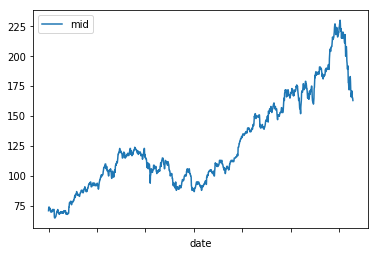

In [ ]:
df.plot(x='date', y='mid')

In [ ]:
df.plot(x='date', y='mid', kind='bar')